In [3]:
!pip install google-cloud-bigquery google-auth db-dtypes

Defaulting to user installation because normal site-packages is not writeable


In [133]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./bigquery_service_account_2.json")

credentials

In [134]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [135]:
import seaborn as sns 
from matplotlib import pyplot as plt

# 연도별
## 21년도 매출 급상승 음식점 탑10

In [13]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_21*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [14]:
df = client.query(sql).to_dataframe()
df

,year,name,sales
0,2021,(주)오설록 제주점,119.0
1,2021,주식회사 토스카나,58.0
2,2021,늘봄흑돼지,52.0
3,2021,주식회사 춘심이네,51.0
4,2021,한화호텔앤드리조트(주)제주지점,49.0
5,2021,더클리프 (주)씨앤모어,48.0
6,2021,(주)파리크라상파리바게뜨 제주공항점,44.0
7,2021,주식회사 우진해장국,44.0
8,2021,(주)파리크라상파리바게뜨제주공항탑승점,41.0
9,2021,델문도,39.0


Text(0, 0.5, 'name')

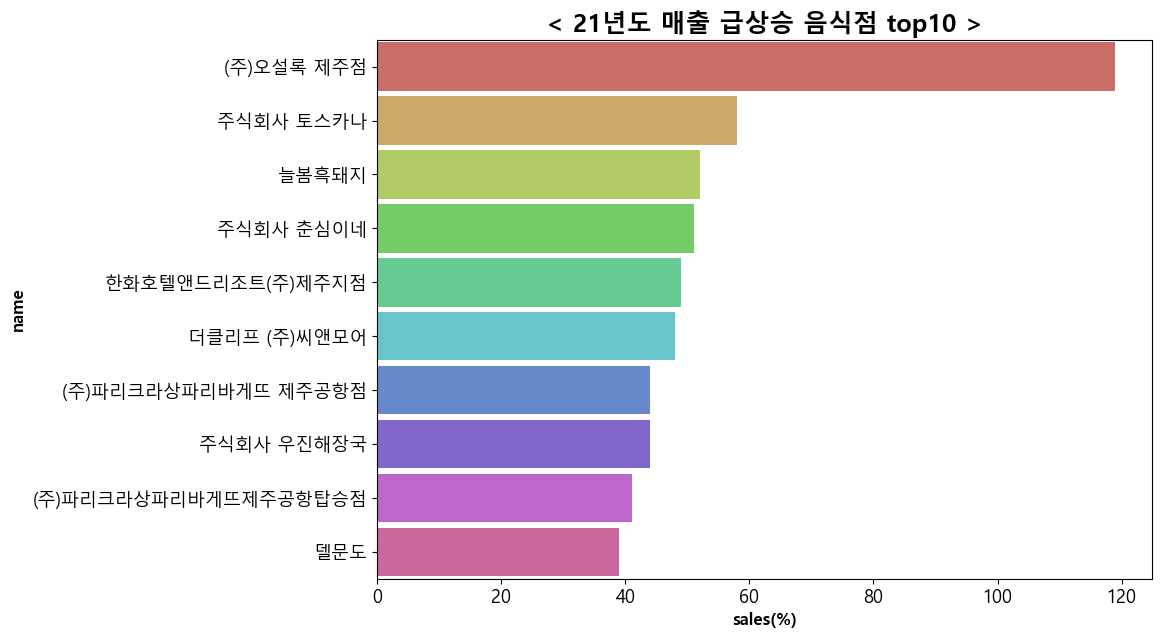

In [24]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21년도 매출 급상승 음식점 top10 >", fontsize=18, weight='bold')



sns.barplot(
    x="sales", 
    y="name",
    data=df,
    width=0.9,
    palette="hls"
)

plt.xlabel('sales(%)', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')


## 22년도 매출 급상승 음식점 탑10

In [25]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_22*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [26]:
df = client.query(sql).to_dataframe()
df

,year,name,sales
0,2022,(주)오설록 제주점,110.0
1,2022,한화호텔앤드리조트(주)제주지점,70.0
2,2022,늘봄흑돼지,59.0
3,2022,파리바게뜨제주공항렌트카하우스점,58.0
4,2022,주식회사 토스카나,54.0
5,2022,주식회사 춘심이네,44.0
6,2022,(주)파리크라상파리바게뜨제주공항탑승점,43.0
7,2022,더클리프 (주)씨앤모어,42.0
8,2022,주식회사 우진해장국,38.0
9,2022,(주)파리크라상파리바게뜨 제주공항점,37.0


Text(0, 0.5, 'name')

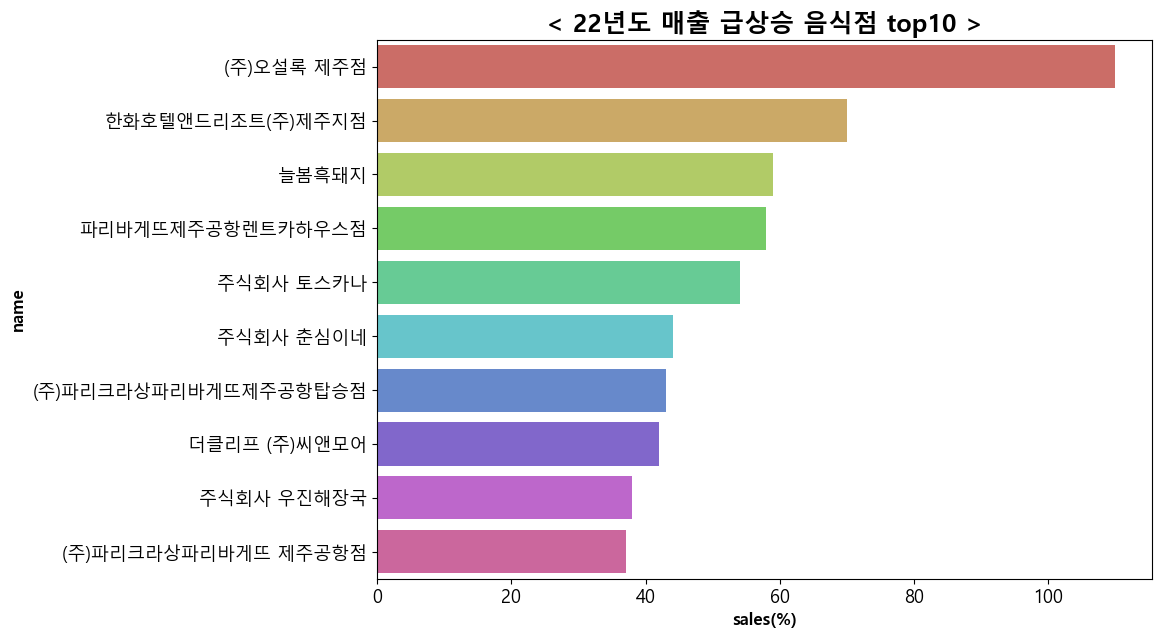

In [27]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 22년도 매출 급상승 음식점 top10 >", fontsize=18, weight='bold')


sns.barplot(
    x="sales", 
    y="name",
    data=df,
    width=0.8,
    palette="hls"
)

plt.xlabel('sales(%)', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

## 23년도 매출 급상승 음식점 탑10

In [28]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [29]:
df = client.query(sql).to_dataframe()
df

,year,name,sales
0,2023,(주)오설록 제주점,100.0
1,2023,파리바게뜨제주공항렌트카하우스점,88.0
2,2023,(주)파리크라상파리바게뜨제주공항탑승점,83.0
3,2023,(주)파리크라상파리바게뜨 제주공항점,71.0
4,2023,한화호텔앤드리조트(주)제주지점,61.0
5,2023,늘봄흑돼지,56.0
6,2023,주식회사 토스카나,53.0
7,2023,우진해장국,52.0
8,2023,숙성도 중문점,52.0
9,2023,돈사돈,43.0


Text(0, 0.5, 'name')

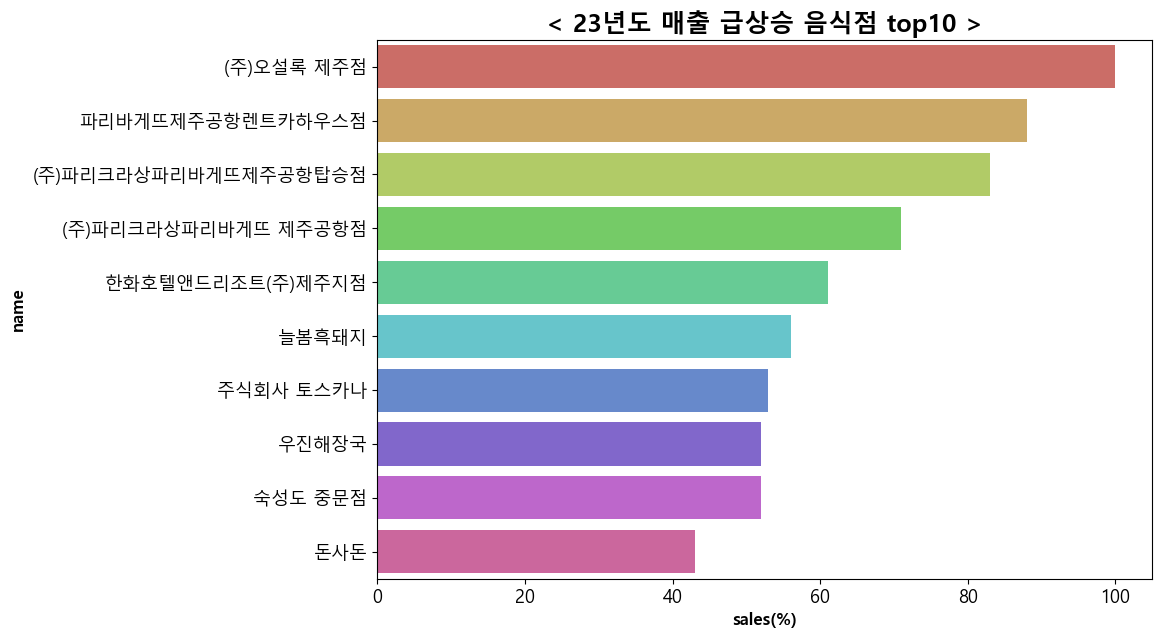

In [30]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 23년도 매출 급상승 음식점 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="sales", 
    y="name",
    data=df,
    width=0.8,
    palette="hls"
)

plt.xlabel('sales(%)', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

## 21~23년 오설록 월별 매출 변화

In [66]:
sql='''
SELECT	
  CMPNM_NM AS name,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  ALL_SALES_PRICE_RATE AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  CMPNM_NM IN ('(주)오설록 제주점')
GROUP BY 
  1,2,3,4
ORDER BY
  4 DESC
'''

In [67]:
df = client.query(sql).to_dataframe()
df

,name,year,month,sales
0,(주)오설록 제주점,2023,9,14.39
1,(주)오설록 제주점,2023,4,12.55
2,(주)오설록 제주점,2023,5,12.29
3,(주)오설록 제주점,2023,2,12.13
4,(주)오설록 제주점,2021,4,12.03
5,(주)오설록 제주점,2022,1,11.72
6,(주)오설록 제주점,2023,3,11.68
7,(주)오설록 제주점,2023,6,11.56
8,(주)오설록 제주점,2021,6,11.54
9,(주)오설록 제주점,2021,2,11.21


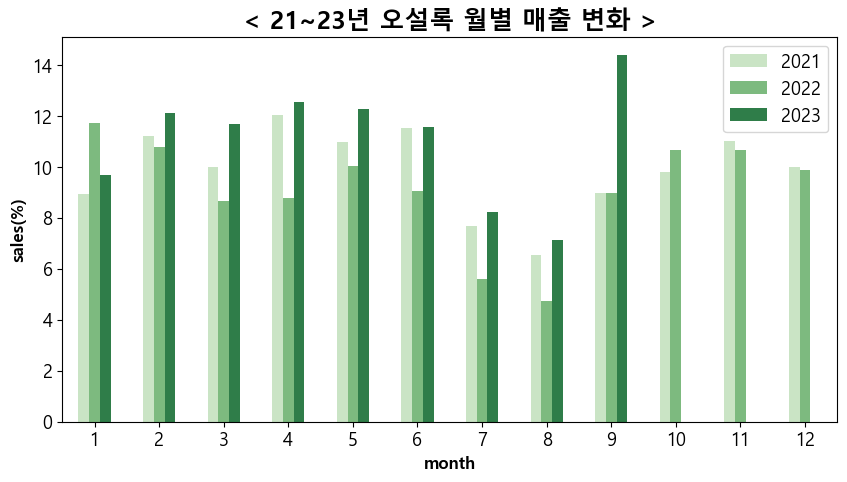

In [69]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 오설록 월별 매출 변화 >", fontsize=18, weight='bold')

sns.barplot(
    data=df,
    x="month", 
    y="sales", 
    hue='year',
    width=0.5,
    palette="Greens"
    
)

plt.ylabel('sales(%)', fontsize=12, weight='bold')
plt.xlabel('month', fontsize=12, weight='bold')
plt.legend(loc = 'upper right')

## 21~23년 오설록 월별 외지인 기준 매출 변화

In [70]:
sql = '''
SELECT
  CMPNM_NM AS name,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  OTSD_SALES_PRICE_RATE AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  CMPNM_NM IN ('(주)오설록 제주점')
GROUP BY 
  1,2,3,4
ORDER BY
  4 DESC
'''

In [71]:
df = client.query(sql).to_dataframe()
df

,name,year,month,tour_sales
0,(주)오설록 제주점,2023,9,14.26
1,(주)오설록 제주점,2023,4,12.82
2,(주)오설록 제주점,2023,6,12.35
3,(주)오설록 제주점,2023,5,12.18
4,(주)오설록 제주점,2023,2,12.15
5,(주)오설록 제주점,2021,4,12.07
6,(주)오설록 제주점,2022,1,11.79
7,(주)오설록 제주점,2023,3,11.61
8,(주)오설록 제주점,2021,6,11.47
9,(주)오설록 제주점,2021,11,10.99


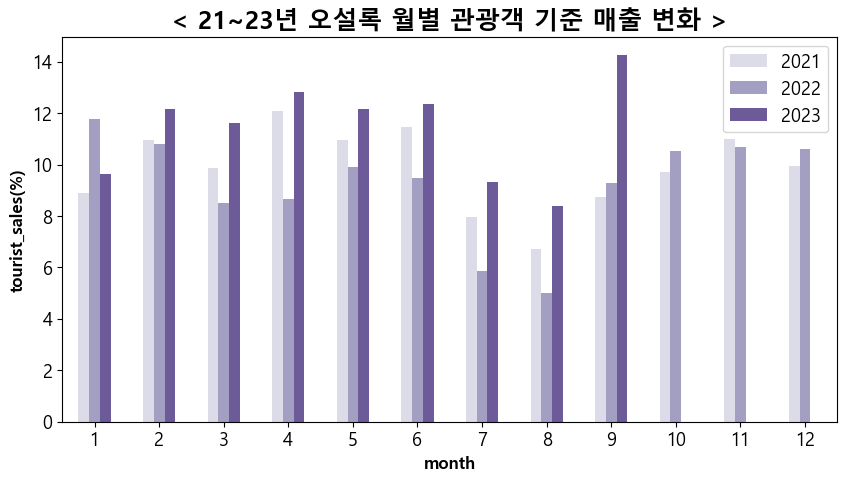

In [72]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 오설록 월별 관광객 기준 매출 변화 >", fontsize=18, weight='bold')


sns.barplot(
    data=df,
    x="month", 
    y="tour_sales", 
    hue='year',
    width=0.5,
    palette="Purples"
    
)

plt.ylabel('tourist_sales(%)', fontsize=12, weight='bold')
plt.xlabel('month', fontsize=12, weight='bold')
plt.legend(loc = 'upper right')

## 21~23년 오설록 월별 현지인 기준 매출 변화

In [73]:
sql = '''
SELECT	
  CMPNM_NM AS name,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  JJINHBT_SALES_PRICE_RATE AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  CMPNM_NM IN ('(주)오설록 제주점')
GROUP BY 
  1,2,3,4
ORDER BY
  4 DESC
'''

In [74]:
df = client.query(sql).to_dataframe()
df

,name,year,month,local_sales
0,(주)오설록 제주점,2022,3,6.48
1,(주)오설록 제주점,2021,9,6.45
2,(주)오설록 제주점,2021,6,6.14
3,(주)오설록 제주점,2023,4,6.01
4,(주)오설록 제주점,2022,2,5.89
5,(주)오설록 제주점,2023,3,5.59
6,(주)오설록 제주점,2023,9,5.36
7,(주)오설록 제주점,2022,1,5.25
8,(주)오설록 제주점,2021,5,5.03
9,(주)오설록 제주점,2022,9,4.95


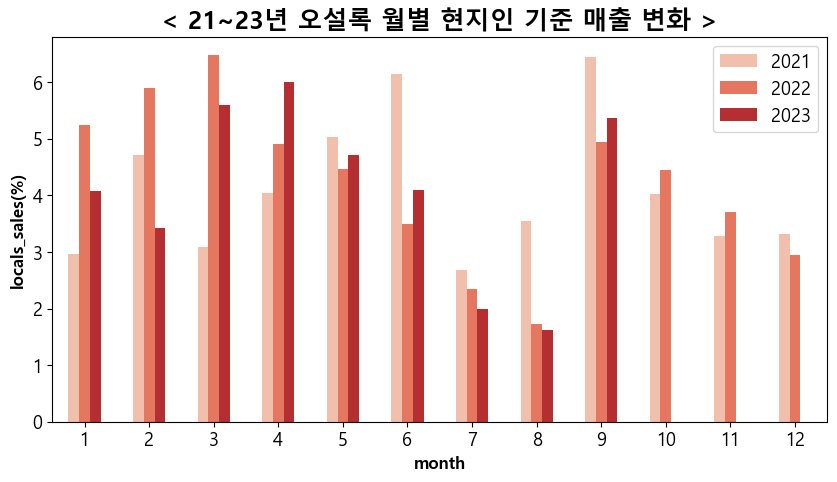

In [75]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 오설록 월별 현지인 기준 매출 변화 >", fontsize=18, weight='bold')

sns.barplot(
    data=df,
    x="month", 
    y="local_sales", 
    hue='year',
    width=0.5,
    palette="Reds"
    
)

plt.ylabel('locals_sales(%)', fontsize=12, weight='bold')
plt.xlabel('month', fontsize=12, weight='bold')
plt.legend(loc = 'upper right')

In [76]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(ALL_SALES_PRICE_RATE) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  1,2
'''

In [77]:
df = client.query(sql).to_dataframe()
df

,year,month,sales
0,2021,1,1845.17
1,2021,2,1633.70
2,2021,3,1433.98
3,2021,4,1620.41
4,2021,5,1443.86
5,2021,6,1442.43
6,2021,7,1104.77
7,2021,8,967.80
8,2021,9,1367.19
9,2021,10,1449.95


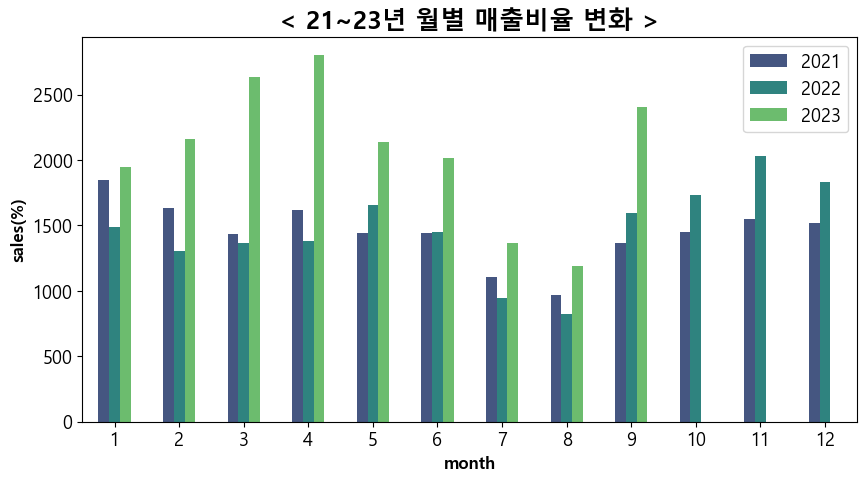

In [78]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 매출비율 변화 >", fontsize=18, weight='bold')


sns.barplot(
    data=df,
    x="month", 
    y="sales", 
    hue='year',
    width=0.5,
    palette="viridis"
)

plt.ylabel('sales(%)', fontsize=12, weight='bold')
plt.xlabel('month', fontsize=12, weight='bold')
plt.legend(loc = 'upper right')

In [79]:
sql= '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(OTSD_SALES_PRICE_RATE) AS tour_sales

FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  1,2
'''

In [80]:
df = client.query(sql).to_dataframe()
df

,year,month,tour_sales
0,2021,1,811.09
1,2021,2,882.45
2,2021,3,779.48
3,2021,4,988.15
4,2021,5,889.50
5,2021,6,904.05
6,2021,7,697.68
7,2021,8,634.44
8,2021,9,807.81
9,2021,10,908.78


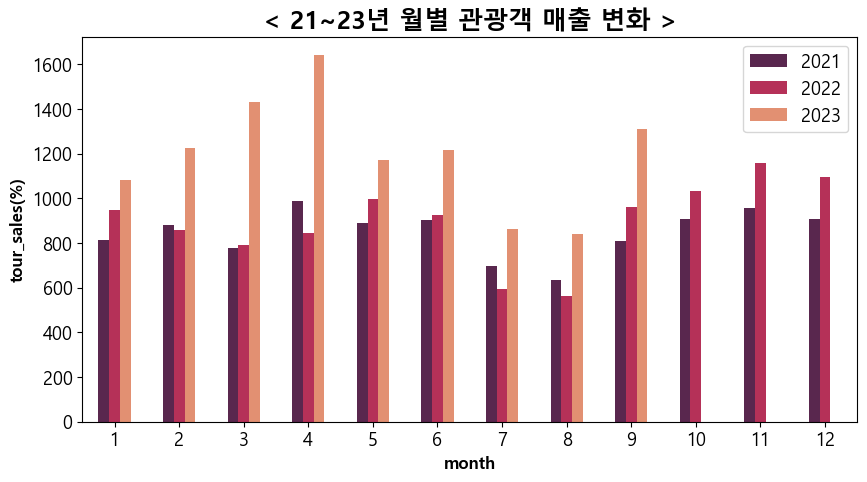

In [81]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 관광객 매출 변화 >", fontsize=18, weight='bold')

sns.barplot(
    data=df,
    x="month", 
    y="tour_sales", 
    hue='year',
    width=0.5,
    palette="rocket"
)

plt.ylabel('tour_sales(%)', fontsize=12, weight='bold')
plt.xlabel('month', fontsize=12, weight='bold')
plt.legend(loc = 'upper right')

In [136]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  MLSFC_NM AS type,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
GROUP BY
  1,2
ORDER BY
  3 DESC

'''

In [137]:
df = client.query(sql).to_dataframe()
df

,year,type,sales
0,2023,한식,12551.22
1,2023,간식,1065.67
2,2023,아시아음식,1064.78
3,2023,음료,765.40
4,2023,양식,618.99
5,2023,패스트푸드,504.01
6,2023,카페,412.62
7,2023,일식.회,360.72
8,2023,주점및주류판매,262.22
9,2023,고기,248.58


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '한식'),
  Text(1, 0, '간식'),
  Text(2, 0, '아시아음식'),
  Text(3, 0, '음료'),
  Text(4, 0, '양식'),
  Text(5, 0, '패스트푸드'),
  Text(6, 0, '카페'),
  Text(7, 0, '일식.회'),
  Text(8, 0, '주점및주류판매'),
  Text(9, 0, '고기'),
  Text(10, 0, '베이커리.디저트'),
  Text(11, 0, '피자.치킨.햄버거'),
  Text(12, 0, '주점'),
  Text(13, 0, '중식'),
  Text(14, 0, '분식'),
  Text(15, 0, '기타'),
  Text(16, 0, '부페')])

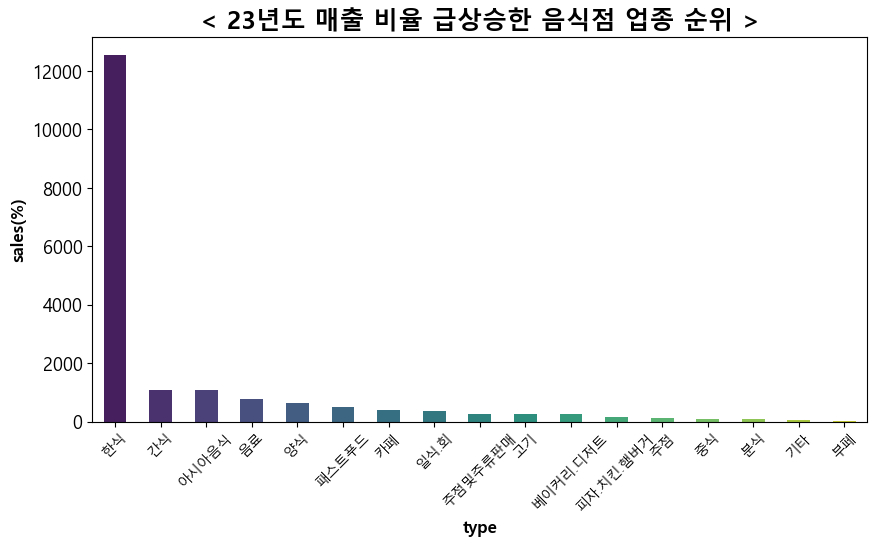

In [138]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 23년도 매출 비율 급상승한 음식점 업종 순위 >", fontsize=18, weight='bold')

sns.barplot(
    x="type", 
    y="sales", 
    data=df,
    width=0.5,
    palette="viridis"
)

plt.ylabel('sales(%)', fontsize=12, weight='bold')
plt.xlabel('type', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=10)

##  21~23년 월별 음식점 업종별 방문율

In [85]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(CASE WHEN MLSFC_NM IN ('간식','베이커리.디저트', '카페', '음료') THEN 1 ELSE 0 END) AS desserts,
  SUM(CASE WHEN MLSFC_NM IN ('피자.치킨.햄버거', '패스트푸드') THEN 1 ELSE 0 END) AS fastfood,
  SUM(CASE WHEN MLSFC_NM IN ('양식') THEN 1 ELSE 0 END) AS pasta,
  SUM(CASE WHEN MLSFC_NM IN ('아시아음식', '일식.회', '중식') THEN 1 ELSE 0 END) AS asiafood,
  SUM(CASE WHEN MLSFC_NM IN ('한식','고기','분식') THEN 1 ELSE 0 END) AS koreafood,
  SUM(CASE WHEN MLSFC_NM IN ('주점및주류판매','주점', '주점 및 주류판매') THEN 1 ELSE 0 END) AS alcohol,
  SUM(CASE WHEN MLSFC_NM IN ('기타','부페') THEN 1 ELSE 0 END) AS etc
FROM 
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1
ORDER BY
  1, 2 DESC, 3 DESC, 4 DESC, 5 DESC, 6 DESC, 7 DESC, 8 DESC
'''

In [86]:
df = client.query(sql).to_dataframe()
df

,month,desserts,fastfood,pasta,asiafood,koreafood,alcohol,etc
0,1,5389,2319,1219,2436,29450,952,78
1,2,5441,2318,1243,2458,29707,963,75
2,3,5525,2317,1267,2490,30267,1011,77
3,4,5558,2324,1297,2509,30486,1010,73
4,5,5568,2310,1321,2508,30630,1000,74
5,6,5562,2304,1308,2499,30373,996,73
6,7,5556,2309,1317,2497,30281,994,72
7,8,5536,2277,1300,2496,30045,976,70
8,9,5517,2256,1290,2466,29846,973,71
9,10,3414,1477,849,1518,19649,627,21


## 21~23년 월별 '회' 음식점 매출 변화

In [87]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales,
  SCLAS_NM AS menu
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  SCLAS_NM = '회'
GROUP BY
  1,3
ORDER BY 
  2 DESC
'''


In [88]:
df = client.query(sql).to_dataframe()
df

,month,sales,menu
0,4,165.02,회
1,11,162.49,회
2,3,145.30,회
3,5,144.49,회
4,9,143.21,회
5,12,140.46,회
6,6,133.31,회
7,1,131.48,회
8,2,126.19,회
9,10,115.19,회


Text(0, 0.5, 'sales(%)')

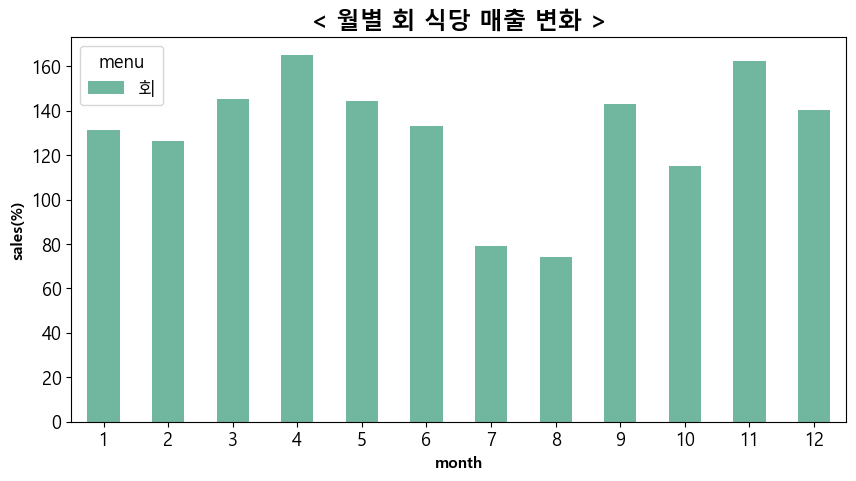

In [89]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title("< 월별 회 식당 매출 변화 >", fontsize=17, weight='bold')
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")

sns.barplot(
    x="month", 
    y="sales", 
    hue='menu',
    data=df,
    width=0.5,
    palette='BuGn'
)

plt.xlabel('month', fontsize=11, weight='bold')
plt.ylabel('sales(%)', fontsize=11, weight='bold')

## 월별 베이커리 음식점 매출 변화

In [90]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales,
  SCLAS_NM AS menu
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  SCLAS_NM = '베이커리'
GROUP BY
  1,3
ORDER BY 
  2 DESC,1
'''

In [91]:
df = client.query(sql).to_dataframe()
df

,month,sales,menu
0,9,283.98,베이커리
1,4,268.08,베이커리
2,3,266.74,베이커리
3,1,266.47,베이커리
4,5,240.66,베이커리
5,2,240.46,베이커리
6,6,221.93,베이커리
7,12,166.74,베이커리
8,11,157.52,베이커리
9,7,150.30,베이커리


Text(0.5, 0, 'name')

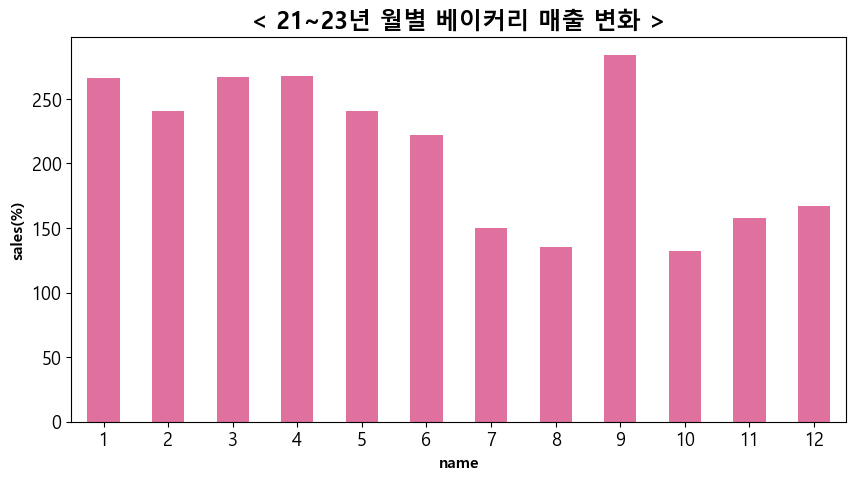

In [92]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 베이커리 매출 변화 >", fontsize=17, weight='bold')

sns.barplot(
    x="month", 
    y="sales", 
    data=df,
    width=0.5,
    palette=['#F25F9B']
)

plt.ylabel('sales(%)', fontsize=11, weight='bold')
plt.xlabel('name', fontsize=11, weight='bold')


## 외지인에게 인기 많은 음식점

In [93]:
sql = '''
SELECT
  CMPNM_NM AS name,
  SCLAS_NM AS menu,
  OTSD_SALES_PRICE_RATE AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
ORDER BY
  3 DESC
LIMIT
  15
'''

In [94]:
df = client.query(sql).to_dataframe()
df

,name,menu,tour_sales
0,(주)파리크라상파리바게뜨제주공항탑승점,베이커리,15.18
1,(주)오설록 제주점,차,14.26
2,(주)파리크라상파리바게뜨 제주공항점,베이커리,12.96
3,파리바게뜨제주공항렌트카하우스점,베이커리,11.21
4,런던베이글뮤지엄 제주,베이커리,7.64
5,우진해장국,가정식,6.81
6,숙성도 중문점,가정식,6.70
7,주식회사 토스카나,양식,6.17
8,숙성도 함덕점,돼지고기,5.06
9,한화호텔앤드리조트(주)제주지점,구내식당/푸드코트,5.02


Text(0, 0.5, 'name')

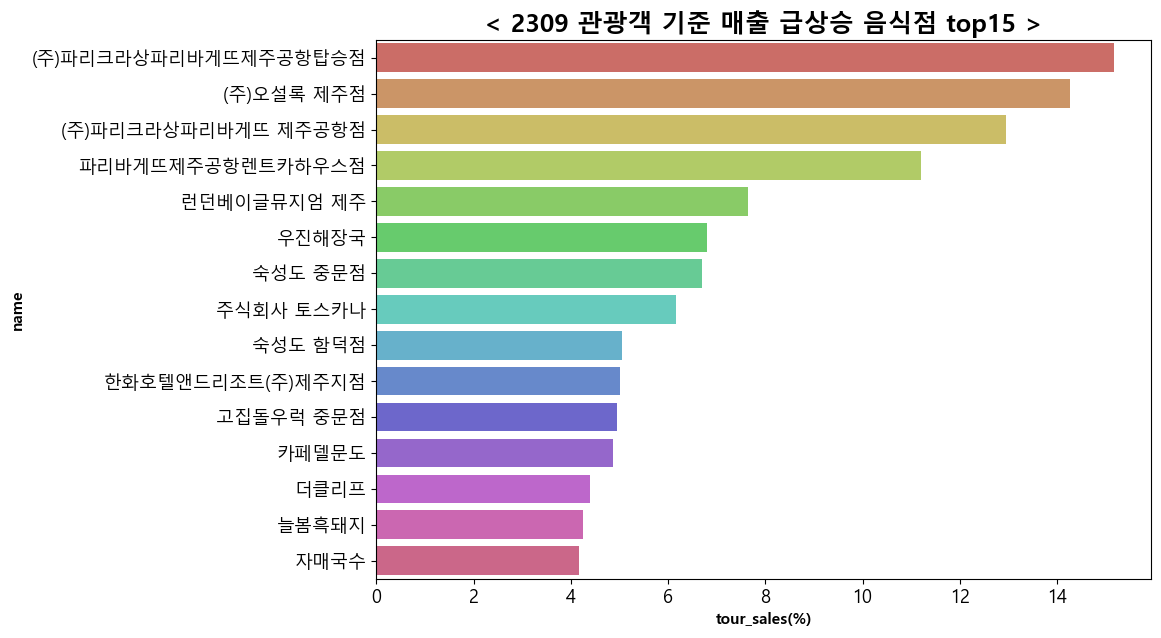

In [95]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 2309 관광객 기준 매출 급상승 음식점 top15 >", fontsize=18, weight='bold')

sns.barplot(
    x="tour_sales", 
    y="name",
    data=df,
    width=0.8,
    palette="hls"
)

plt.xlabel('tour_sales(%)', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

## 현지인에게 인기 많은 음식점

In [139]:
sql = '''
SELECT
  CMPNM_NM AS name,
  SCLAS_NM AS menu,
  JJINHBT_SALES_PRICE_RATE AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
ORDER BY
  3 DESC
LIMIT
  15
'''

In [140]:
df = client.query(sql).to_dataframe()
df

,name,menu,local_sales
0,안다미로늘봄,단품요리 전문,38.15
1,(유)아웃백스테이크하우스 제주아일랜드점,패밀리 레스토랑,37.30
2,제주늘봄,가정식,32.42
3,씨제이푸드빌(주) 빕스 제주점,패밀리 레스토랑,29.42
4,한국맥도날드(유)제주노형점,햄버거,25.35
5,디앤,단품요리 전문,22.67
6,늘봄흑돼지,돼지고기,20.46
7,한국맥도날드(유)제주시청점,햄버거,18.35
8,주식회사 와인창고,주류,17.67
9,파리바게뜨 제주제스코본점,베이커리,17.31


Text(0, 0.5, 'name')

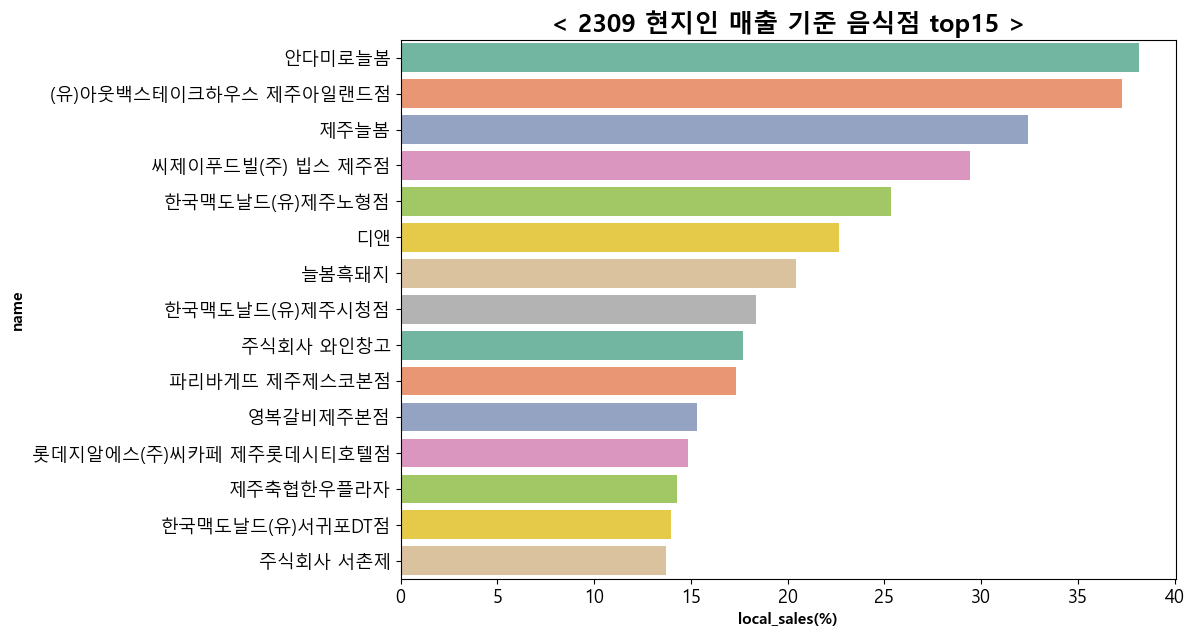

In [141]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 2309 현지인 매출 기준 음식점 top15 >", fontsize=18, weight='bold')

sns.barplot(
    x="local_sales", 
    y="name",
    data=df,
    width=0.8,
    palette="Set2"
)

plt.xlabel('local_sales(%)', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

## 2309 외지인 기준 탑10 베이커리 음식점 (유명 프랜차이즈 제외)

In [99]:
sql = '''
SELECT
  CMPNM_NM AS name,
  OTSD_SALES_PRICE_RATE AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
WHERE 
  MLSFC_NM IN ('베이커리.디저트', '카페', '음료') AND 
  CMPNM_NM NOT IN ('(주)파리크라상파리바게뜨제주공항탑승점', '(주)오설록 제주점', '(주)파리크라상파리바게뜨 제주공항점', '파리바게뜨제주공항렌트카하우스점', '엔제리너스 제주공항T/O')
GROUP BY
  1,2
ORDER BY
  2 DESC
LIMIT
  10
'''

In [100]:
df = client.query(sql).to_dataframe()
df

,name,tour_sales
0,카페델문도,4.87
1,더클리프,4.39
2,랜디스도넛 제주직영점,2.89
3,오드랑베이커리,2.44
4,호텔샌드,1.76
5,제주 하멜,1.46
6,아쿠아플라넷 제주,1.45
7,앙뚜아네트 용담점,1.38
8,우무,1.33
9,카페노티드 제주애월,1.30


Text(0, 0.5, 'name')

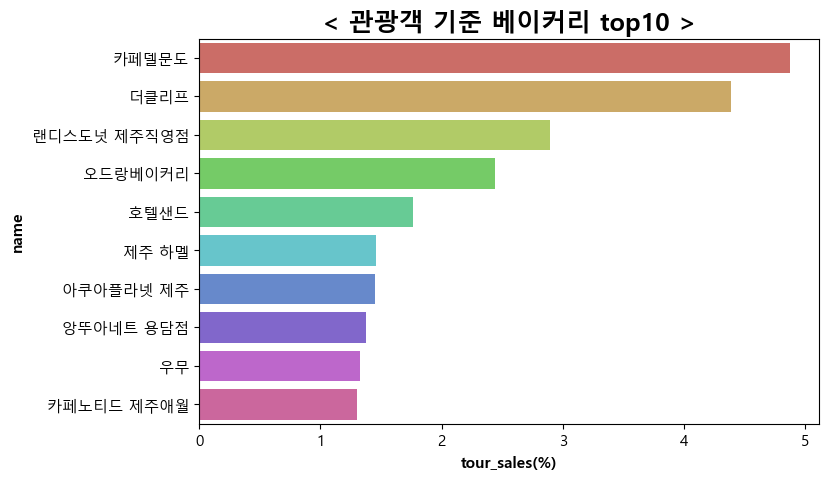

In [101]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 관광객 기준 베이커리 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="tour_sales", 
    y="name",
    data=df,
    width=0.8,
    palette="hls"
)

plt.xlabel('tour_sales(%)', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

## 현지인 기준 탑10 베이커리 음식점 (유명 프랜차이즈 제외)

In [102]:
sql = '''
SELECT
  CMPNM_NM AS name,
  JJINHBT_SALES_PRICE_RATE AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
WHERE 
  MLSFC_NM IN ('베이커리.디저트', '카페', '음료') AND 
  CMPNM_NM NOT IN ('(주)파리크라상파리바게뜨제주공항탑승점', '(주)오설록 제주점', '(주)파리크라상파리바게뜨 제주공항점', '파리바게뜨제주공항렌트카하우스점', '엔제리너스 제주공항T/O')
GROUP BY
  1,2
ORDER BY
  2 DESC
LIMIT
  10
'''

In [103]:
df = client.query(sql).to_dataframe()
df

,name,local_sales
0,파리바게뜨 제주제스코본점,17.31
1,롯데지알에스(주)씨카페 제주롯데시티호텔점,14.83
2,풀바셋제주아라DT점,9.15
3,탐앤탐스커피제주시청점,6.80
4,폴 바셋 제주용담DT점,6.34
5,오드랑베이커리,6.26
6,해맑은떡방,5.57
7,명당양과,5.53
8,뚜레쥬르 제주일도점,5.45
9,에스프레소 라운지,4.94


Text(0, 0.5, 'name')

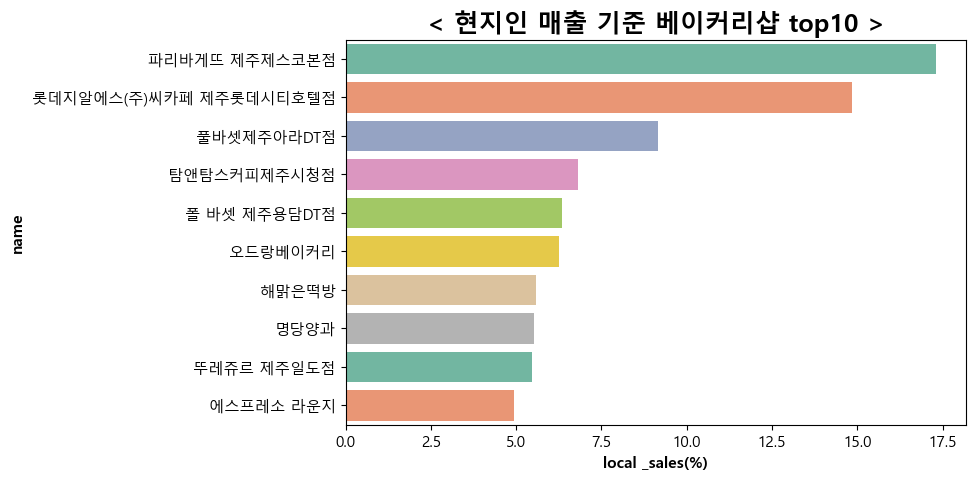

In [104]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 현지인 매출 기준 베이커리샵 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="local_sales", 
    y="name",
    data=df,
    width=0.8,
    palette="Set2"
)

plt.xlabel('local _sales(%)', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

## 현지인 기준 한식 음식점 top10

In [105]:
sql = '''
SELECT
  CMPNM_NM AS name,
  JJINHBT_SALES_PRICE_RATE AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
WHERE 
  MLSFC_NM IN ('한식') AND CMPNM_NM NOT IN ('런던베이글뮤지엄 제주')
GROUP BY
  1,2
ORDER BY
  2 DESC
LIMIT
  10
'''

In [106]:
df = client.query(sql).to_dataframe()
df

,name,local_sales
0,안다미로늘봄,38.15
1,제주늘봄,32.42
2,디앤,22.67
3,늘봄흑돼지,20.46
4,영복갈비제주본점,15.34
5,주식회사 서촌제,13.70
6,제주통큰장어,13.48
7,태백산제주본점,12.83
8,도남오거리도남점,12.44
9,푸주옥,12.24


Text(0, 0.5, 'name')

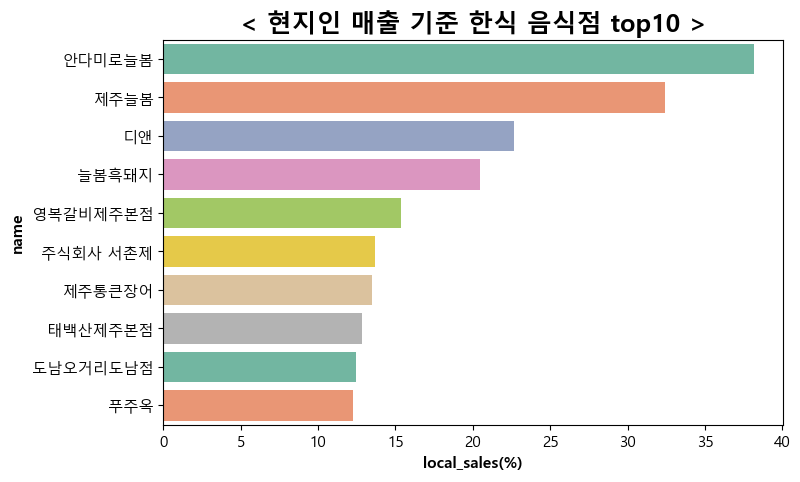

In [107]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 현지인 매출 기준 한식 음식점 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="local_sales", 
    y="name",
    data=df,
    width=0.8,
    palette="Set2"
)

plt.xlabel('local_sales(%)', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

In [108]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  sum(JJINHBT_SALES_PRICE_RATE) AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
WHERE 
  MLSFC_NM IN ('한식') 
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT
  10
'''

In [109]:
df = client.query(sql).to_dataframe()
df

,year,name,local_sales
0,2023,제주늘봄,242.45
1,2023,늘봄흑돼지,193.19
2,2023,푸주옥,160.19
3,2023,안다미로늘봄,145.21
4,2023,태백산제주본점,122.83
5,2023,주식회사 서촌제,116.27
6,2023,영복갈비제주본점,109.49
7,2023,디앤,109.37
8,2023,제주통큰장어,106.23
9,2023,푸주옥노형점,103.99


## 연도별 핫플레이스 지역

In [110]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  ADSTRD_NM AS region,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
    ADSTRD_NM != '0'
GROUP BY
  1,2
ORDER BY
  1,3 DESC
'''

In [111]:
df = client.query(sql).to_dataframe()
df

,year,region,sales
0,2021,노형동,1467.0
1,2021,연동,1349.0
2,2021,애월읍,1205.0
3,2021,이도2동,1154.0
4,2021,안덕면,821.0
...,...,...,...
123,2023,이호동,110.0
124,2023,영천동,90.0
125,2023,서홍동,87.0
126,2023,효돈동,87.0


Text(0.5, 0, 'region')

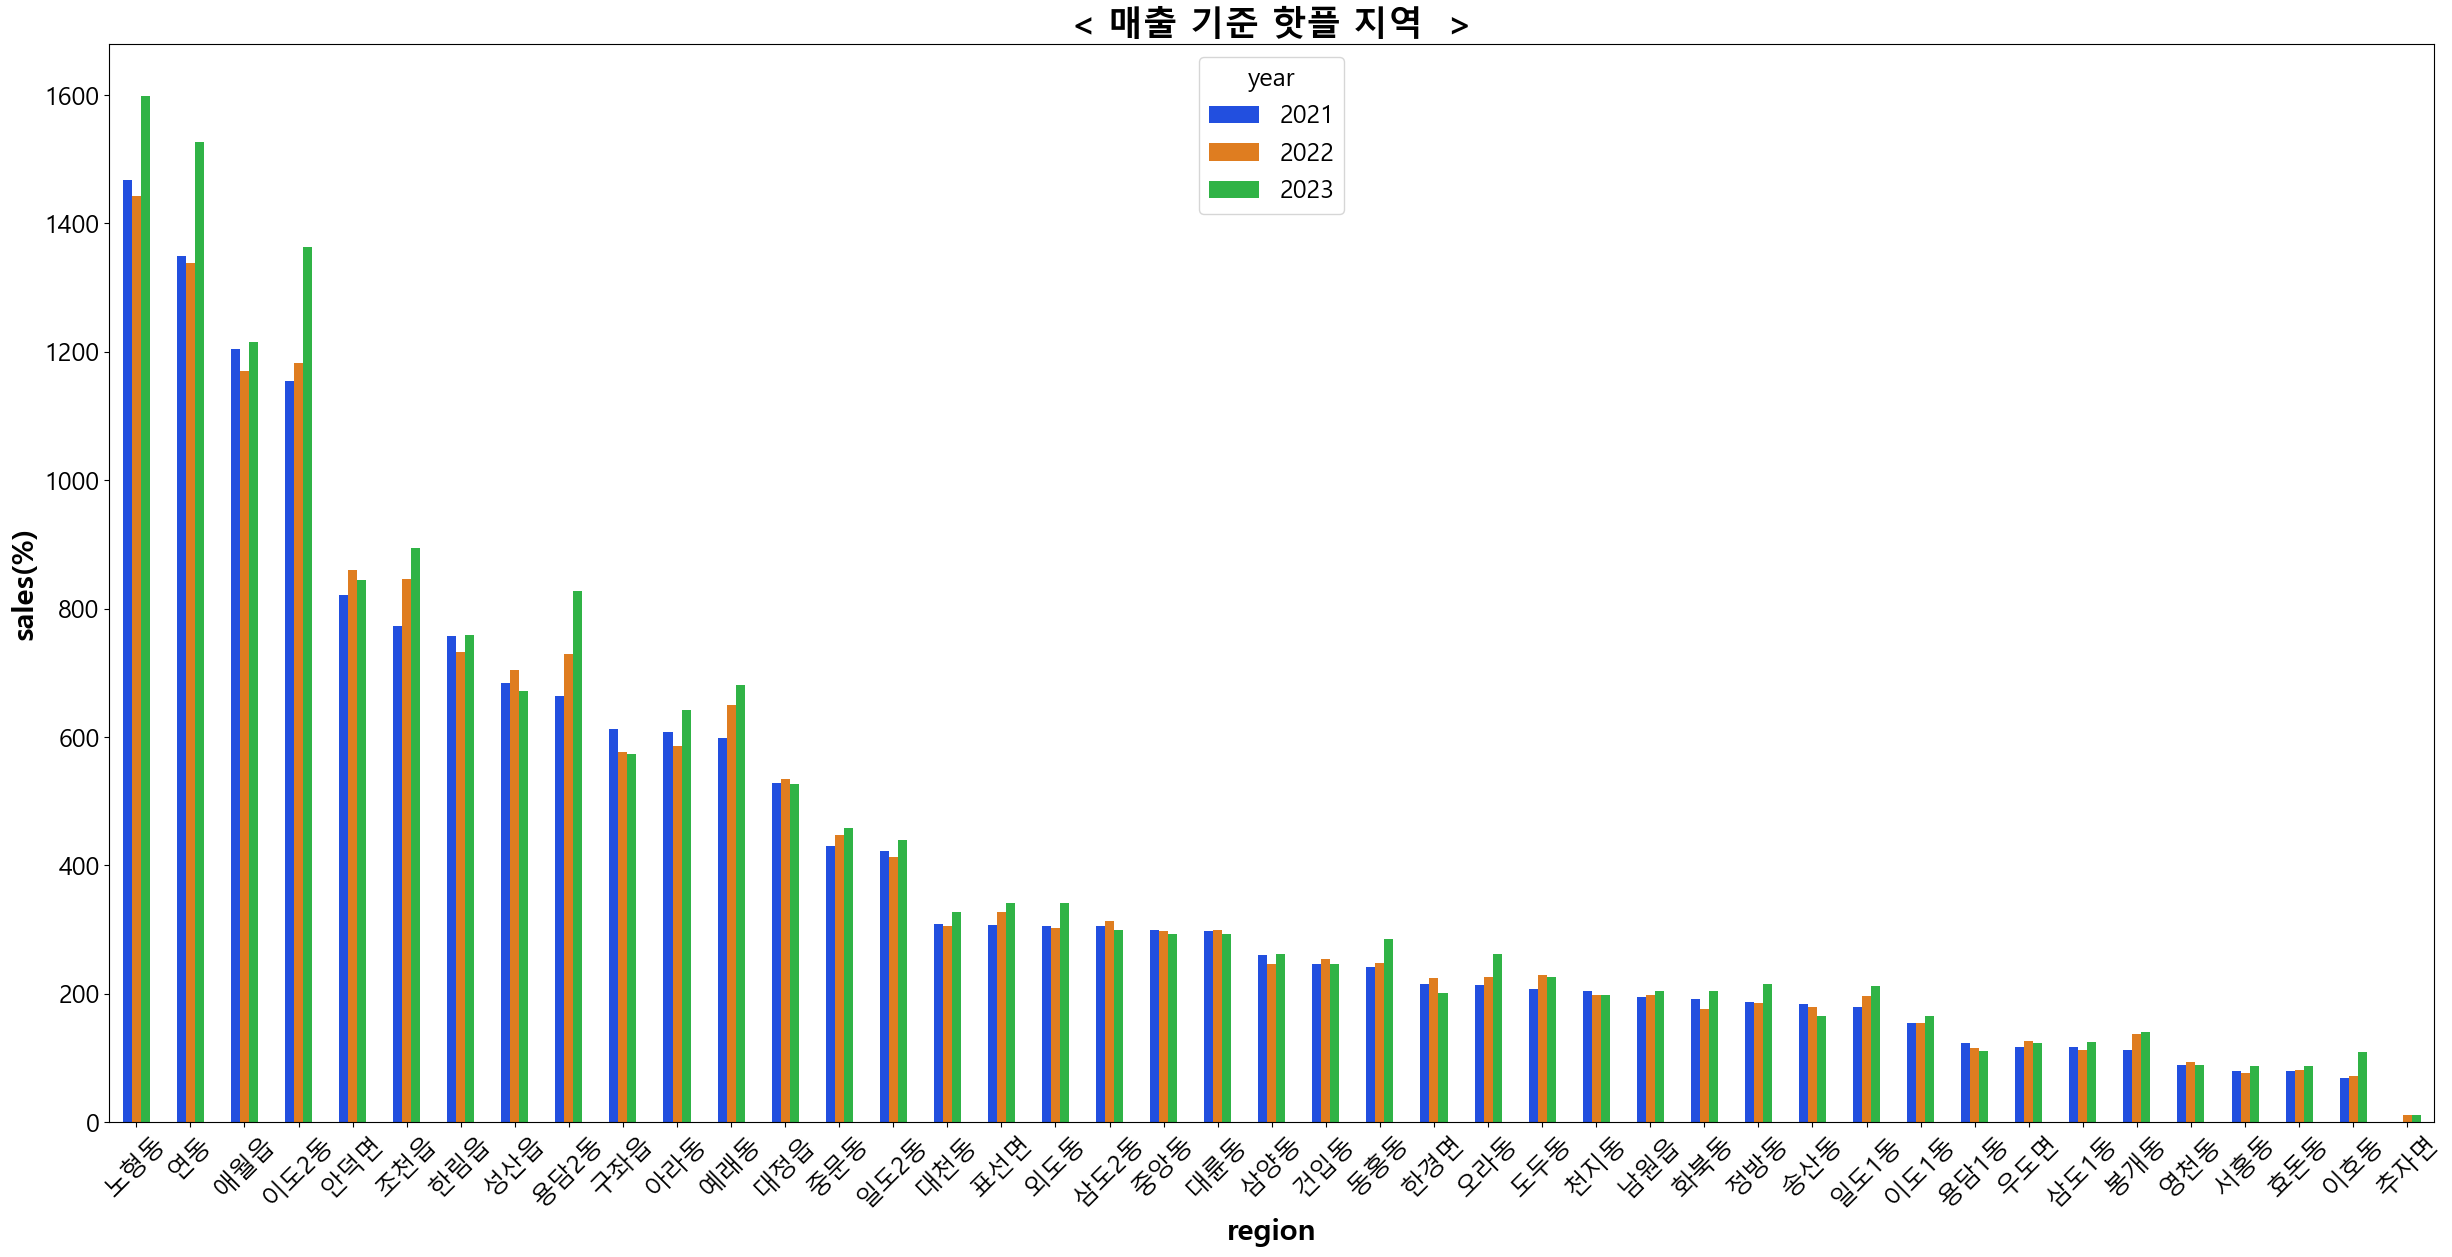

In [114]:
plt.rcParams['figure.figsize'] = (30, 14)
plt.rc("font", family = "Malgun Gothic", size=18, style="normal")
plt.title("< 매출 기준 핫플 지역  >", fontsize=25, weight='bold')
plt.xticks(rotation=45)

sns.barplot(
    x="region", 
    y="sales", 
    hue="year",
    data=df,
    width=0.5,
    palette="bright"
)

plt.ylabel('sales(%)', fontsize=21, weight='bold')
plt.xlabel('region', fontsize=21, weight='bold')

## 2309 매출 기준 핫한 지역 탑10

In [115]:
sql = '''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10

'''

In [116]:
df = client.query(sql).to_dataframe()
df

,town,city,sales
0,노형동,제주시,205.75
1,연동,제주시,193.53
2,이도2동,제주시,181.43
3,애월읍,제주시,153.68
4,조천읍,제주시,119.35
5,용담2동,제주시,114.00
6,안덕면,서귀포시,108.13
7,한림읍,제주시,99.94
8,아라동,제주시,84.36
9,구좌읍,제주시,84.25


Text(0.5, 0, 'region')

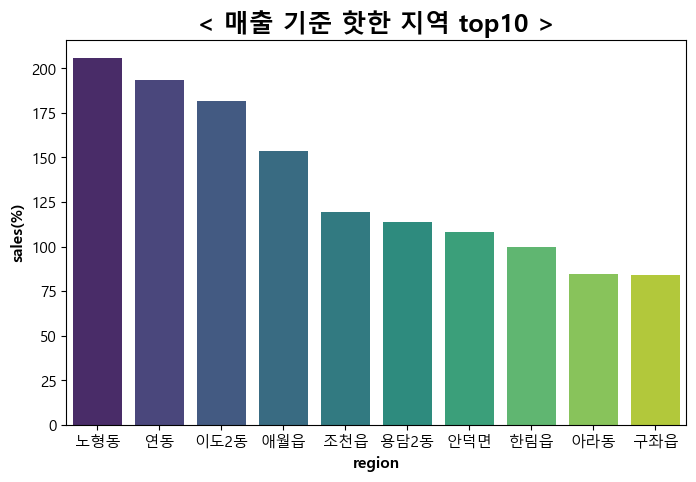

In [117]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 매출 기준 핫한 지역 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="town", 
    y="sales",
    data=df,
    width=0.8,
    palette="viridis"
)

plt.ylabel('sales(%)', fontsize=11, weight='bold')
plt.xlabel('region', fontsize=11, weight='bold')

## 2309 방문율 기준 핫한 지역

In [118]:
sql = '''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  COUNT(*) AS cnt
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [119]:
df = client.query(sql).to_dataframe()
df

,town,city,cnt
0,이도2동,제주시,1256
1,연동,제주시,1222
2,노형동,제주시,1070
3,애월읍,제주시,807
4,한림읍,제주시,679
5,구좌읍,제주시,641
6,조천읍,제주시,628
7,성산읍,서귀포시,553
8,아라동,제주시,533
9,대정읍,서귀포시,513


Text(0.5, 0, 'region')

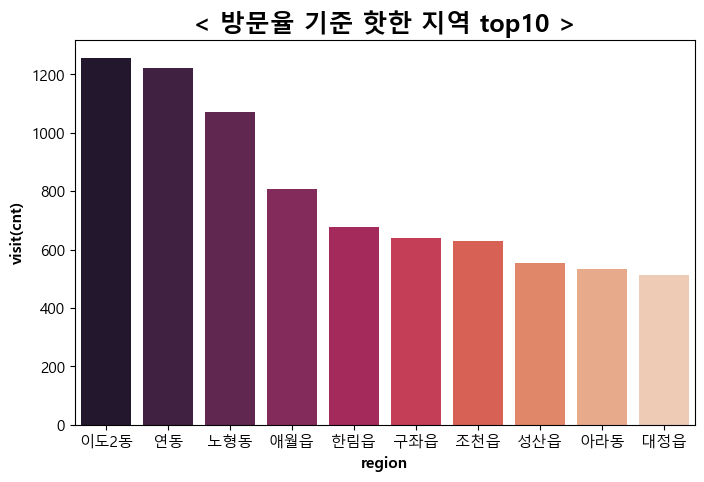

In [120]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 방문율 기준 핫한 지역 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="town", 
    y="cnt",
    data=df,
    width=0.8,
    palette="rocket"
)

plt.ylabel('visit(cnt)', fontsize=11, weight='bold')
plt.xlabel('region', fontsize=11, weight='bold')

## 23년도 인기 있는 베이커리 동네 

In [121]:
sql='''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
WHERE 
  SCLAS_NM IN ('베이커리')
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT
  10
'''

In [122]:
df = client.query(sql).to_dataframe()
df

,town,city,sales
0,용담2동,제주시,256.34
1,노형동,제주시,64.39
2,이도2동,제주시,59.94
3,연동,제주시,48.33
4,구좌읍,제주시,45.34
5,일도1동,제주시,45.04
6,조천읍,제주시,42.44
7,대정읍,서귀포시,41.35
8,애월읍,제주시,40.16
9,아라동,제주시,35.31


Text(0.5, 0, 'region')

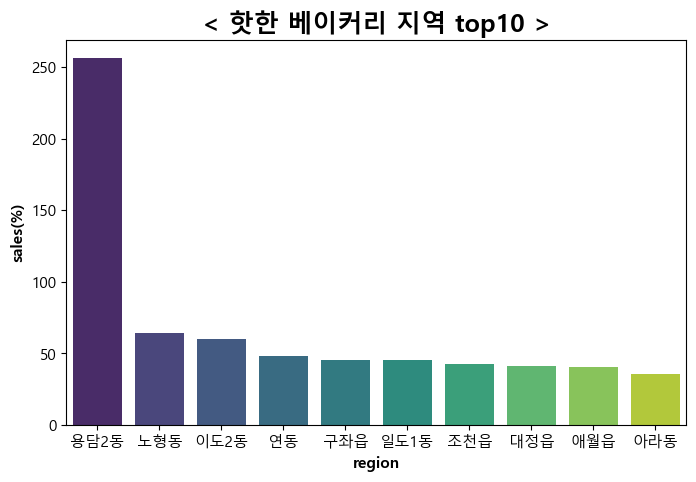

In [123]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 핫한 베이커리 지역 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="town", 
    y="sales",
    data=df,
    width=0.8,
    palette="viridis"
)

plt.ylabel('sales(%)', fontsize=11, weight='bold')
plt.xlabel('region', fontsize=11, weight='bold')

In [124]:
sql='''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
WHERE 
  MLSFC_NM IN ('한식')
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT
  10
'''

In [125]:
df = client.query(sql).to_dataframe()
df

,town,city,sales
0,노형동,제주시,1086.09
1,연동,제주시,1019.63
2,이도2동,제주시,882.19
3,애월읍,제주시,865.29
4,조천읍,제주시,641.56
5,안덕면,서귀포시,554.23
6,한림읍,제주시,551.54
7,예래동,서귀포시,533.10
8,성산읍,서귀포시,482.09
9,구좌읍,제주시,420.87


Text(0.5, 0, 'region')

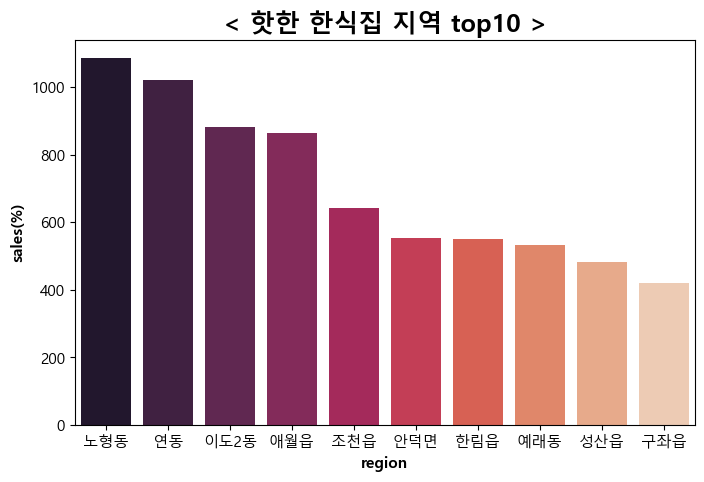

In [126]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 핫한 한식집 지역 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="town", 
    y="sales",
    data=df,
    width=0.8,
    palette="rocket"
)

plt.ylabel('sales(%)', fontsize=11, weight='bold')
plt.xlabel('region', fontsize=11, weight='bold')

In [127]:
sql='''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(JJINHBT_SALES_PRICE_RATE),2) AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT
  10
'''

In [128]:
df = client.query(sql).to_dataframe()
df

,town,city,local_sales
0,이도2동,제주시,38640.14
1,노형동,제주시,37504.11
2,연동,제주시,32472.36
3,아라동,제주시,19275.90
4,일도2동,제주시,13488.62
5,애월읍,제주시,10999.82
6,외도동,제주시,9386.40
7,조천읍,제주시,8928.80
8,대정읍,서귀포시,8443.48
9,삼양동,제주시,8385.22


Text(0.5, 0, 'region')

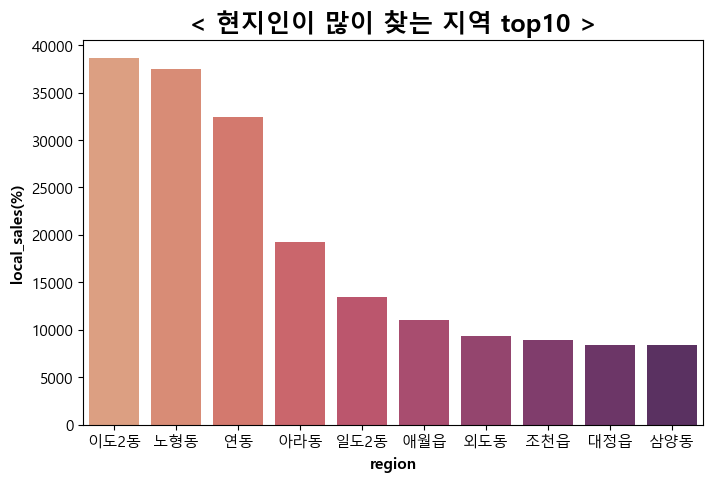

In [129]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 현지인이 많이 찾는 지역 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="town", 
    y="local_sales",
    data=df,
    width=0.8,
    palette="flare"
)

plt.ylabel('local_sales(%)', fontsize=11, weight='bold')
plt.xlabel('region', fontsize=11, weight='bold')

In [130]:
sql='''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(OTSD_SALES_PRICE_RATE),2) AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT
  10
'''

In [131]:
df = client.query(sql).to_dataframe()
df

,town,city,tour_sales
0,애월읍,제주시,2890.57
1,안덕면,서귀포시,2149.24
2,조천읍,제주시,1926.77
3,예래동,서귀포시,1824.14
4,성산읍,서귀포시,1809.17
5,용담2동,제주시,1805.27
6,연동,제주시,1805.22
7,한림읍,제주시,1751.44
8,노형동,제주시,1729.74
9,구좌읍,제주시,1514.33


Text(0.5, 0, 'region')

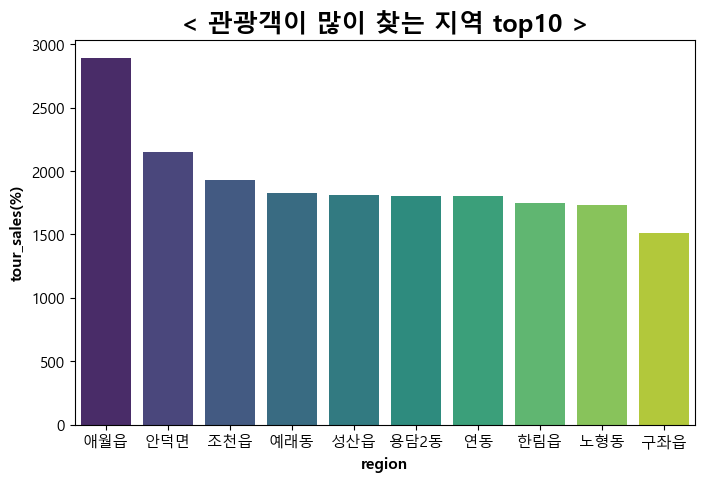

In [132]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc("font", family = "Malgun Gothic", size=11, style="normal")
plt.title("< 관광객이 많이 찾는 지역 top10 >", fontsize=18, weight='bold')

sns.barplot(
    x="town", 
    y="tour_sales",
    data=df,
    width=0.8,
    palette="viridis"
)

plt.ylabel('tour_sales(%)', fontsize=11, weight='bold')
plt.xlabel('region', fontsize=11, weight='bold')